# Data_Science_Job_Salaries_Analysis

The project is related to Data Science Job salaries.We will try to find out what is the future of data science,as if people are stepping in to Data science or not.Also we will try to find out the average salary ratios with respect to different experience level and with the passage of time.

This analysis is basically an assignment which is a part of the course [Data Analysis with Python: Zero to Pandas](zerotopandas.com)

The data is collected from Kaggle and following libraries are used in the project:
* OS
* opendatasets
* pandas
* matplotlib
* Seaborn
* Jovain


## Downloading the Dataset


Downloading the data form the link https://www.kaggle.com/datasets/ruchi798/data-science-job-salaries ,
using Opendatsets library

Now first step is to install opendatasets library and  import it.Also import os function to see the list of items in the directory.

In [46]:
!pip install opendatasets --upgrade



In [47]:
import opendatasets as od


In [48]:
od.download("https://www.kaggle.com/datasets/ruchi798/data-science-job-salaries")


Skipping, found downloaded files in "./data-science-job-salaries" (use force=True to force download)


In [49]:
import os
os.listdir('data-science-job-salaries')

['ds_salaries.csv']

let's import Pandas to open the dataset

In [50]:
import pandas as pd

Let us save and upload our work to Jovian before continuing.

In [51]:
project_name = "Data_Science_Job_Salaries_Analysis" # change this (use lowercase letters and hyphens only)

In [52]:
!pip install jovian --upgrade -q

In [53]:
import jovian

In [54]:
jovian.commit(project=project_name)

<IPython.core.display.Javascript object>

[jovian] Updating notebook "haiderali605/data-science-job-salaries-analysis" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/haiderali605/data-science-job-salaries-analysis


'https://jovian.ai/haiderali605/data-science-job-salaries-analysis'

## Data Preparation and Cleaning

Here we will perform some operations related to data cleaning, missing data,feature Engineering etc



In [55]:
ds_salaries=pd.read_csv("./data-science-job-salaries/ds_salaries.csv",index_col=0)

In [56]:
ds_salaries

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L
...,...,...,...,...,...,...,...,...,...,...,...
602,2022,SE,FT,Data Engineer,154000,USD,154000,US,100,US,M
603,2022,SE,FT,Data Engineer,126000,USD,126000,US,100,US,M
604,2022,SE,FT,Data Analyst,129000,USD,129000,US,0,US,M
605,2022,SE,FT,Data Analyst,150000,USD,150000,US,100,US,M


The data set contain 607 rows and 11 columns

We are going to use the information of salary in USD, so are going to remove the two coulmns i.e., salary and salary_currency by using drop function.





In [57]:
ds_salaries.drop(["salary","salary_currency"],axis=1,inplace=True)

In [58]:
ds_salaries.head()

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,MI,FT,Data Scientist,79833,DE,0,DE,L
1,2020,SE,FT,Machine Learning Scientist,260000,JP,0,JP,S
2,2020,SE,FT,Big Data Engineer,109024,GB,50,GB,M
3,2020,MI,FT,Product Data Analyst,20000,HN,0,HN,S
4,2020,SE,FT,Machine Learning Engineer,150000,US,50,US,L



Experience_level:
The experience level in the job during the year with the following possible values: EN Entry-level / Junior MI Mid-level / Intermediate SE Senior-level / Expert EX Executive-level / Director

Employment_type:
The type of employem.ent for the role: PT Part-time FT Full-time CT Contract FL Freelance.

remote_ratio:
The overall amount of work done remotely, possible values are as follows: 0 No remote work (less than 20%) 50 Partially remote 100 Fully remote (more than 80%)

company_size:The average number of people that worked for the company during the year: S less than 50 employees (small) M 50 to 250 employees (medium) L more than 250 employees (large)

In [59]:
ds_salaries.describe()

,work_year,salary_in_usd,remote_ratio
count,607.000000,607.000000,607.00000
mean,2021.405272,112297.869852,70.92257
std,0.692133,70957.259411,40.70913
min,2020.000000,2859.000000,0.00000
25%,2021.000000,62726.000000,50.00000
50%,2022.000000,101570.000000,100.00000
75%,2022.000000,150000.000000,100.00000
max,2022.000000,600000.000000,100.00000


In [60]:
ds_salaries.isnull().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

The good thing about this data set is that it has zero missing data,which is good for analysis purpose

In [61]:
ds_salaries.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 607 entries, 0 to 606
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           607 non-null    int64 
 1   experience_level    607 non-null    object
 2   employment_type     607 non-null    object
 3   job_title           607 non-null    object
 4   salary_in_usd       607 non-null    int64 
 5   employee_residence  607 non-null    object
 6   remote_ratio        607 non-null    int64 
 7   company_location    607 non-null    object
 8   company_size        607 non-null    object
dtypes: int64(3), object(6)
memory usage: 47.4+ KB


The data contain 3 int data and 6 string data

In [62]:
ds_salaries.head()


,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,MI,FT,Data Scientist,79833,DE,0,DE,L
1,2020,SE,FT,Machine Learning Scientist,260000,JP,0,JP,S
2,2020,SE,FT,Big Data Engineer,109024,GB,50,GB,M
3,2020,MI,FT,Product Data Analyst,20000,HN,0,HN,S
4,2020,SE,FT,Machine Learning Engineer,150000,US,50,US,L


In [63]:
print("experience_level_unique_values",ds_salaries.experience_level.unique())
print("employment_type_unique_value", ds_salaries.employment_type.unique())
print("remote_ratio_uniques_value" ,ds_salaries.remote_ratio.unique())
print("company_size_unique_value" ,ds_salaries.company_size.unique())
#print("Job_Title_unique_value" ,ds_salaries.job_title.unique())


experience_level_unique_values ['MI' 'SE' 'EN' 'EX']
employment_type_unique_value ['FT' 'CT' 'PT' 'FL']
remote_ratio_uniques_value [  0  50 100]
company_size_unique_value ['L' 'S' 'M']


In [64]:
data_2020=ds_salaries[ds_salaries.work_year==2020]
data_2021=ds_salaries[ds_salaries.work_year==2021]
data_2022=ds_salaries[ds_salaries.work_year==2022]

let's convert the experience_level,Employement_type and Company_size in to integer using $map$ function,so that analysis of the data would be easy

In [65]:
ds_salaries["experience_level_code"]=ds_salaries["experience_level"].map({"MI":1,"SE":2,"EN":3,"EX":4})
ds_salaries["employment_type_code"]=ds_salaries["employment_type"].map({"FT":1,"CT":2,"PT":3,"FL":4})
ds_salaries["company_size_code"]=ds_salaries["company_size"].map({"L":1,"S":2,"M":3})



In [66]:
ds_salaries.head(3)

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,experience_level_code,employment_type_code,company_size_code
0,2020,MI,FT,Data Scientist,79833,DE,0,DE,L,1,1,1
1,2020,SE,FT,Machine Learning Scientist,260000,JP,0,JP,S,2,1,2
2,2020,SE,FT,Big Data Engineer,109024,GB,50,GB,M,2,1,3


Now let's remove the experience_level,Employement_type and Company_size orignal columns from the data set using $drop$function

In [67]:
ds_salaries.drop("experience_level",axis=1,inplace=True)
ds_salaries.drop("employment_type",axis=1,inplace=True)
ds_salaries.drop("company_size",axis=1,inplace=True)




In [68]:
ds_salaries.head(3)

,work_year,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,experience_level_code,employment_type_code,company_size_code
0,2020,Data Scientist,79833,DE,0,DE,1,1,1
1,2020,Machine Learning Scientist,260000,JP,0,JP,2,1,2
2,2020,Big Data Engineer,109024,GB,50,GB,2,1,3


In [69]:
ds_salaries.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 607 entries, 0 to 606
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   work_year              607 non-null    int64 
 1   job_title              607 non-null    object
 2   salary_in_usd          607 non-null    int64 
 3   employee_residence     607 non-null    object
 4   remote_ratio           607 non-null    int64 
 5   company_location       607 non-null    object
 6   experience_level_code  607 non-null    int64 
 7   employment_type_code   607 non-null    int64 
 8   company_size_code      607 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 47.4+ KB


In [70]:
import jovian

In [333]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "haiderali605/data-science-job-salaries-analysis" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/haiderali605/data-science-job-salaries-analysis


'https://jovian.ai/haiderali605/data-science-job-salaries-analysis'

## Exploratory Analysis and Visualization

Here we will try different methods related to data visualization and Exploratory analysis to explore more about the data 



Let's begin by importing`matplotlib.pyplot` and `seaborn`.

In [71]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [72]:
ds_salaries.head(5)


,work_year,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,experience_level_code,employment_type_code,company_size_code
0,2020,Data Scientist,79833,DE,0,DE,1,1,1
1,2020,Machine Learning Scientist,260000,JP,0,JP,2,1,2
2,2020,Big Data Engineer,109024,GB,50,GB,2,1,3
3,2020,Product Data Analyst,20000,HN,0,HN,1,1,2
4,2020,Machine Learning Engineer,150000,US,50,US,2,1,1


In [73]:
ds_salaries.describe()


,work_year,salary_in_usd,remote_ratio,experience_level_code,employment_type_code,company_size_code
count,607.000000,607.000000,607.00000,607.000000,607.000000,607.000000
mean,2021.405272,112297.869852,70.92257,1.879736,1.060956,2.210873
std,0.692133,70957.259411,40.70913,0.808597,0.360474,0.905619
min,2020.000000,2859.000000,0.00000,1.000000,1.000000,1.000000
25%,2021.000000,62726.000000,50.00000,1.000000,1.000000,1.000000
50%,2022.000000,101570.000000,100.00000,2.000000,1.000000,3.000000
75%,2022.000000,150000.000000,100.00000,2.000000,1.000000,3.000000
max,2022.000000,600000.000000,100.00000,4.000000,4.000000,3.000000


Here we can see that the min value of salary is 2859 US dollar and maximum salary is 600000 US dollar.In the same way mean is 112297.8 US dollar and std is 70957.2 US dollar


**Let's explore the average salary by using boxplot**

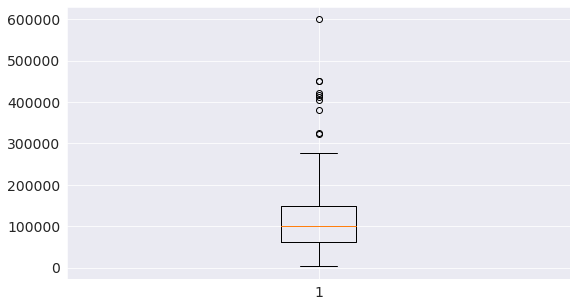

In [74]:
plt.boxplot(ds_salaries.salary_in_usd);


with the help of boxpolt, it is clear that only one person salary was 600000 USD,so it is better to drop this value,as this outlier is may affecting the average salary

In [75]:
ds_salaries.loc[ds_salaries["salary_in_usd"]>500000]

,work_year,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,experience_level_code,employment_type_code,company_size_code
252,2021,Principal Data Engineer,600000,US,100,US,4,1,1


In [76]:
ds_salaries.loc[ds_salaries.job_title=='Principal Data Engineer']


,work_year,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,experience_level_code,employment_type_code,company_size_code
121,2021,Principal Data Engineer,200000,US,100,US,2,1,3
215,2021,Principal Data Engineer,185000,US,100,US,2,1,1
252,2021,Principal Data Engineer,600000,US,100,US,4,1,1


In [77]:
ds_salaries

,work_year,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,experience_level_code,employment_type_code,company_size_code
0,2020,Data Scientist,79833,DE,0,DE,1,1,1
1,2020,Machine Learning Scientist,260000,JP,0,JP,2,1,2
2,2020,Big Data Engineer,109024,GB,50,GB,2,1,3
3,2020,Product Data Analyst,20000,HN,0,HN,1,1,2
4,2020,Machine Learning Engineer,150000,US,50,US,2,1,1
...,...,...,...,...,...,...,...,...,...
602,2022,Data Engineer,154000,US,100,US,2,1,3
603,2022,Data Engineer,126000,US,100,US,2,1,3
604,2022,Data Analyst,129000,US,0,US,2,1,3
605,2022,Data Analyst,150000,US,100,US,2,1,3


In [78]:
ds_salaries.drop(index=252,inplace=True)

In [79]:
ds_salaries.loc[ds_salaries.job_title=='Principal Data Engineer']


,work_year,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,experience_level_code,employment_type_code,company_size_code
121,2021,Principal Data Engineer,200000,US,100,US,2,1,3
215,2021,Principal Data Engineer,185000,US,100,US,2,1,1


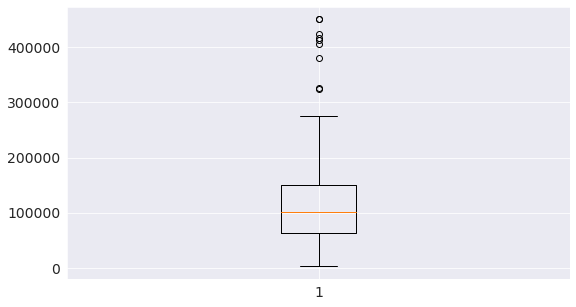

In [80]:
plt.boxplot(ds_salaries.salary_in_usd);

Exploring the average salary in 2020,2021 and 2022 individually

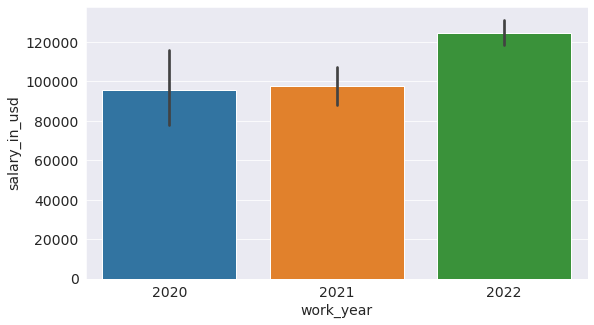

In [81]:
sns.barplot(x= 'work_year',y='salary_in_usd',data=ds_salaries);

We can see that average salary is more in 2022 as compared to 2021 and 2022.Additionaly, the average salary in 2020 and 2021 is quite similar

*Exploring the relation between Experience level and Salary in USD*

In [82]:
ds_salaries.head(3)

,work_year,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,experience_level_code,employment_type_code,company_size_code
0,2020,Data Scientist,79833,DE,0,DE,1,1,1
1,2020,Machine Learning Scientist,260000,JP,0,JP,2,1,2
2,2020,Big Data Engineer,109024,GB,50,GB,2,1,3


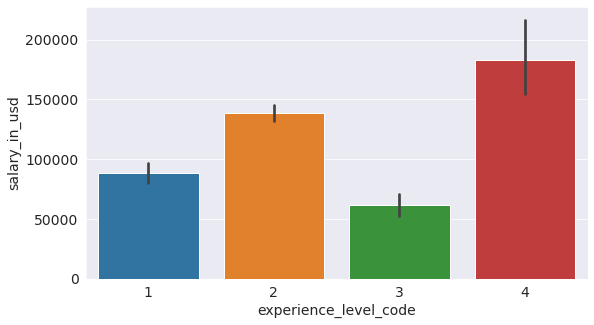

In [83]:
sns.barplot(x= 'experience_level_code',y='salary_in_usd',data=ds_salaries);


*Here {"MI":1,"SE":2,"EN":3,"EX":4}*

* Junior MI Mid-level=1
* Intermediate SE Senior-level=2
* Entry-level=3
* Expert EX Executive-level / Director=4

Here,it can be observe that average salary of EX is much higher than other three experience levels ie., average salary of EX is 183367.72 USD

In [84]:
ds_salaries.salary_in_usd[ds_salaries.experience_level_code==4].describe()

count        25.000000
mean     183367.720000
std       85570.576221
min       69741.000000
25%      130000.000000
50%      167875.000000
75%      230000.000000
max      416000.000000
Name: salary_in_usd, dtype: float64

Exploring number of people working in Data Science  with respect to their experience level 

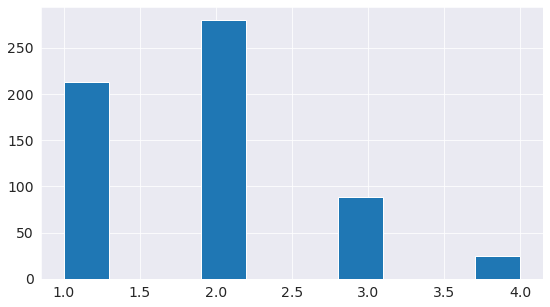

In [85]:
plt.hist(ds_salaries.experience_level_code);

*Here {"MI":1,"SE":2,"EN":3,"EX":4}*

In above graph we can see that most people are falling under Intermediate level which is Senior Level

<AxesSubplot:xlabel='experience_level_code', ylabel='Count'>

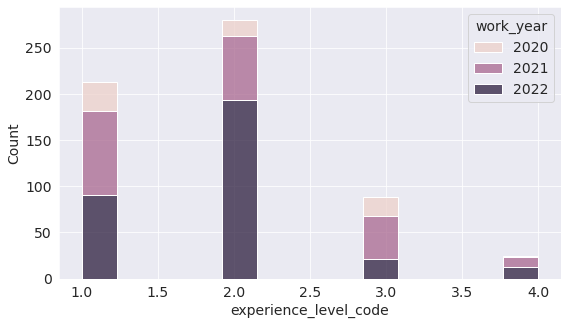

In [86]:
sns.histplot(data=ds_salaries,x="experience_level_code",hue="work_year", multiple ="stack")



Here we can conlude that with passing years more number of people are adopting Data Science

Exploring the ratio of people based on their Employement Type

In [87]:
ds_salaries.head(1)

,work_year,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,experience_level_code,employment_type_code,company_size_code
0,2020,Data Scientist,79833,DE,0,DE,1,1,1


<AxesSubplot:xlabel='employment_type_code', ylabel='Count'>

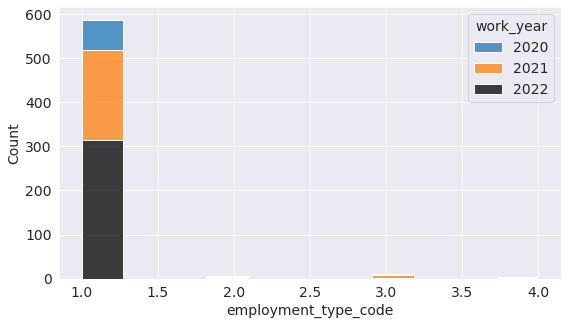

In [88]:
sns.histplot(data=ds_salaries,x="employment_type_code",hue="work_year", multiple ="stack", palette=["C0", "C1", "k"])


Here:{"FT":1,"CT":2,"PT":3,"FL":4}

* FT Full-time=1
* CT Contract =2
* PT Part-time=3
* FL Freelance=4

As we can see in the above histgram that, most of the people who are in the field of Data Science are Full time job holders.
Other three types are negligible as compare to Full time Job holders

In [89]:
ds_salaries.head(2)

,work_year,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,experience_level_code,employment_type_code,company_size_code
0,2020,Data Scientist,79833,DE,0,DE,1,1,1
1,2020,Machine Learning Scientist,260000,JP,0,JP,2,1,2


Let us save and upload our work to Jovian before continuing

In [353]:
import jovian

In [354]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "haiderali605/data-science-job-salaries-analysis" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/haiderali605/data-science-job-salaries-analysis


'https://jovian.ai/haiderali605/data-science-job-salaries-analysis'

## Asking and Answering Questions

Here are some Questions and answer related to our analysis



#### Q1: Is salary dependent on Experience level?

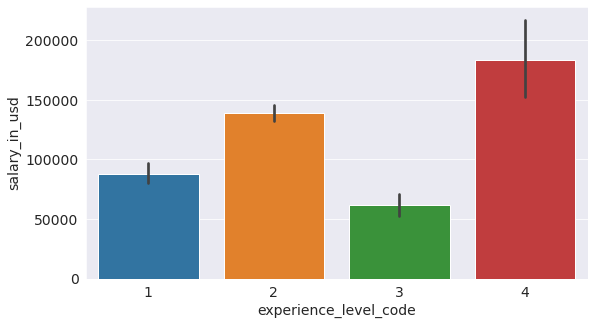

In [90]:
sns.barplot(x= 'experience_level_code',y='salary_in_usd',data=ds_salaries);



Yes,It can be seen in the barplot that cummutalively the Average salary of Executive level are much higher than other types.

*Here {"MI":1,"SE":2,"EN":3,"EX":4}*

* Junior MI Mid-level=1
* Intermediate SE Senior-level=2
* Entry-level=3
* Expert EX Executive-level / Director=4

#### Q2: Which type of Employement, employees are mostly doing?

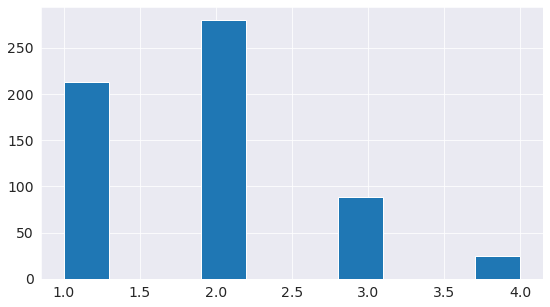

In [91]:
plt.hist(ds_salaries.experience_level_code);

Here we can see that in between 2020-2022 a large number of people are working as Senior Level and very minute number are working at Exective Level.In addition to this the number of Entry level is also not that satisfactory as compared to others

#### Q3: What is the ratio of Remote as compared to other types?

Remote_ratio: The overall amount of work done remotely, possible values are as follows: 0 No remote work (less than 20%) 50 Partially remote 100 Fully remote (more than 80%)

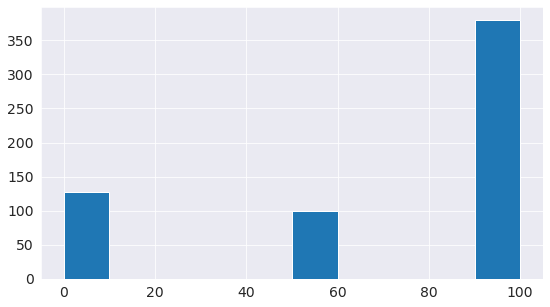

In [92]:
plt.hist(ds_salaries.remote_ratio);

In [93]:
ds_salaries.remote_ratio.describe()

count    606.000000
mean      70.874587
std       40.725578
min        0.000000
25%       50.000000
50%      100.000000
75%      100.000000
max      100.000000
Name: remote_ratio, dtype: float64

From the above graph,we can conclude the ratio of people working as remote are highly in number.

#### Q4:Are people adopting/joining the Data Science Field is increasing or decreasing?


Text(0, 0.5, 'No. of people')

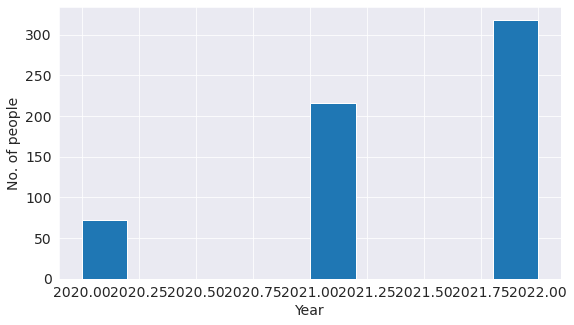

In [94]:
plt.hist(ds_salaries.work_year);
plt.xlabel('Year')
plt.ylabel('No. of people')


It can be see from the graph that with passing years, more and more people are adopting Data Science

#### Q5:What is the average salary of Data Science employee in three years(2020,21,22) combinely?

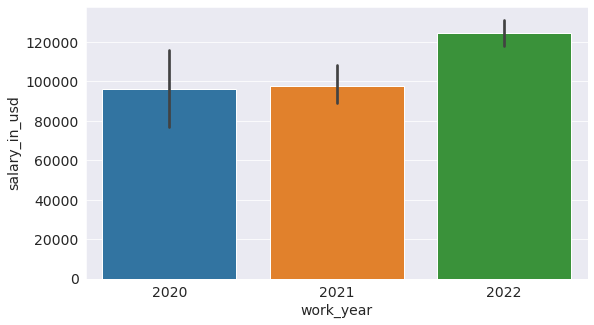

In [95]:
sns.barplot(x= 'work_year',y='salary_in_usd',data=ds_salaries);


In [96]:
data_2020=ds_salaries[ds_salaries.work_year==2020]
data_2021=ds_salaries[ds_salaries.work_year==2021]
data_2022=ds_salaries[ds_salaries.work_year==2022]

print("average salary in 2020 in USD: ",data_2020.salary_in_usd.mean(),"$")
print("average salary in 2021 in USD: ",data_2021.salary_in_usd.mean(),'$')
print("average salary in 2022 in USD: ",data_2022.salary_in_usd.mean(),'$')


average salary in 2020 in USD:  95813.0 $
average salary in 2021 in USD:  97538.30092592593 $
average salary in 2022 in USD:  124522.00628930818 $


Here we can see the average salary with repect to different years

Let us save and upload our work to Jovian before continuing.

In [364]:
import jovian

In [365]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "haiderali605/data-science-job-salaries-analysis" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/haiderali605/data-science-job-salaries-analysis


'https://jovian.ai/haiderali605/data-science-job-salaries-analysis'

## Inferences and Conclusion

Here we can conlude that the ratio of people stepping in the field of Data Science is increasing with the passage of years.In the same way the Salaries are also increasing with passing years.In addition to this,at executive level the no. of people are very less in number and their average salaries are much greater than those who are working under them.
One another inference is that, there is still an oppportunity for those who want to start their career in Data Science, as the total number of employess are not that high, also people working as Entry level are also not in huge number.

In [97]:
import jovian

In [98]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "haiderali605/data-science-job-salaries-analysis" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/haiderali605/data-science-job-salaries-analysis


'https://jovian.ai/haiderali605/data-science-job-salaries-analysis'

## References and Future Work


There are many other columns we use in future to analysis where most of the companies are located and also we can analyse about the location of employees and find out which country is producing people in the field of Data Science.


In [99]:
import jovian

In [100]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "haiderali605/data-science-job-salaries-analysis" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/haiderali605/data-science-job-salaries-analysis


'https://jovian.ai/haiderali605/data-science-job-salaries-analysis'